# Il Giro d'Italia negli ultimi <span style="color:red;">35 anni</span>
<div align="left" style="position: absolute; bottom: 100; left:50;">
  <p>Progetto di Thomas Casasola</p>
</div>

# Perché <span style="color:red;">35</span>
2 motivazioni principali:
- Evoluzione tecnologica
- Tecniche di allenamento e di gara

# Nascita del progetto
- Ex ciclista agonistico
- Curiosità personale

Domande che mi sorgono a riguardo:
- Quanto è cambiato il giro d'italia negli anni a venire?
- Quali sono le caratteristiche fische che i corridori devono avere?
- Quali nazioni e squadre sono le piu vincenti?

# Dataset utilizzati
Per lo sviluppo del progetto sono stati usati:
- InfoGiro.csv(creato)
- CorridoriGiro.csv(creato)

Con informazioni tratte da:
- ProCyclingStats
- Wikipedia

In [5]:
import pandas as pd
DatiGiro=pd.read_csv('InfoGiro.csv')
CorrGiro=pd.read_csv('CorridoriGiro.csv')

# Creiamo un DataFrame ausiliario
df = pd.DataFrame(DatiGiro)

# Convertiamo la colonna Ore in minuti
def converti_durata_in_minuti(durata_string):
    ore, minuti = map(int, durata_string.split(":"))
    return (ore * 60 + minuti)/60

df['tempotot'] = df['ore'].apply(converti_durata_in_minuti)
df['km/h']=df['km']/df['tempotot']

# Andamento del Giro d'Italia

In [67]:
merged_data = pd.merge(DatiGiro, CorrGiro, on='anno')
merged_data_vincitori = pd.merge(CorrGiro, DatiGiro, on='anno')
merged_data['km/h']=df['km/h']
merged_data_vincitori['durezza']=df['durezza']


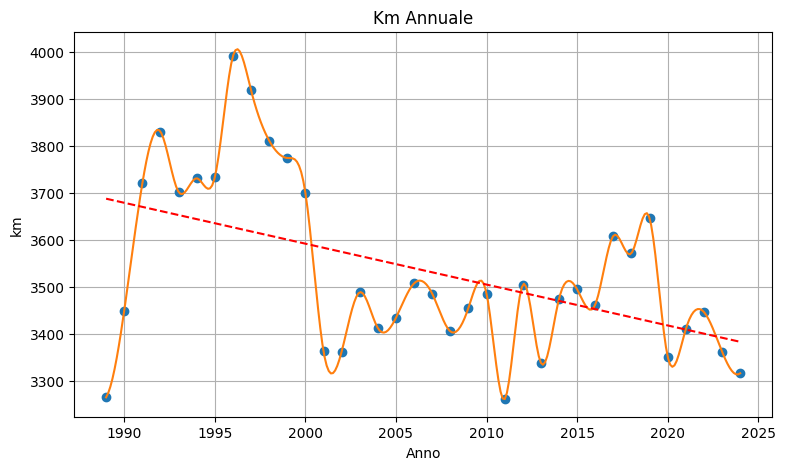

In [12]:
# Terzo Grafico
data=df['anno'],df['km']
dl=pd.DataFrame(data)

# Calcolo della linea di tendenza
z = np.polyfit(df['anno'], df['km'], 1)
p = np.poly1d(z)

plt.figure(figsize=(9,5))

# Interpolazione spline
spl = make_interp_spline(df['anno'], df['km'], k=3)

years_new = np.linspace(df['anno'].min(), df['anno'].max(), 300)
kmh_smooth = spl(years_new)

# Plot della linea di tendenza e della curva smussata
plt.plot(df['anno'], df['km'], 'o', label='Dati')
plt.plot(years_new, kmh_smooth, '-', label='Linea di andamento')
plt.plot(df['anno'], p(df['anno']), 'r--', label='Retta di tendenza')
plt.xlabel('Anno')
plt.ylabel('km')
plt.title('Km Annuale')
plt.grid(True)
plt.show()

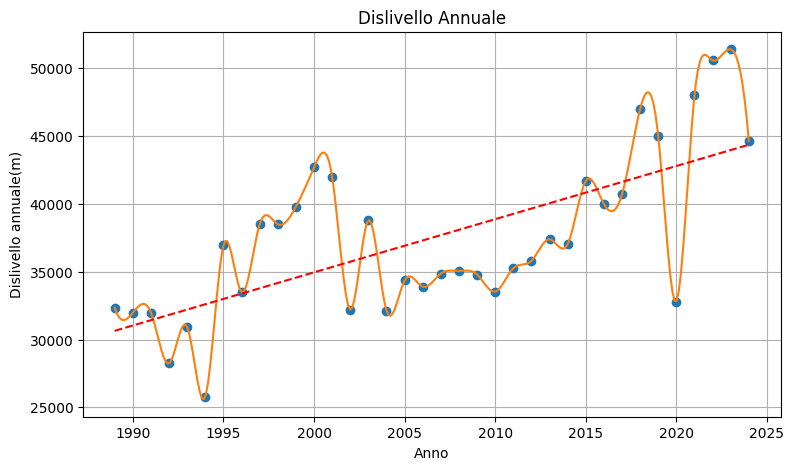

In [14]:
# Secondo GRafico
data=df['anno'],df['dislivello']
dl=pd.DataFrame(data)
# Calcolo della linea di tendenza
z = np.polyfit(df['anno'], df['dislivello'], 1)
p = np.poly1d(z)

plt.figure(figsize=(9,5))

# Interpolazione spline 
spl = make_interp_spline(df['anno'], df['dislivello'], k=3)

# Calcolo dei nuovi dati interpolati 
years_new = np.linspace(df['anno'].min(), df['anno'].max(), 300)
kmh_smooth = spl(years_new)

# Plot della linea di tendenza e della curva smussata
plt.plot(df['anno'], df['dislivello'], 'o', label='Dati')
plt.plot(years_new, kmh_smooth, '-', label='Linea di andamento')
plt.plot(df['anno'], p(df['anno']), 'r--', label='Retta di tendenza')
plt.xlabel('Anno')
plt.ylabel('Dislivello annuale(m)')
plt.title('Dislivello Annuale')
plt.grid(True)
plt.show()

il 2020 mostra un decremento a causa del COVID-19

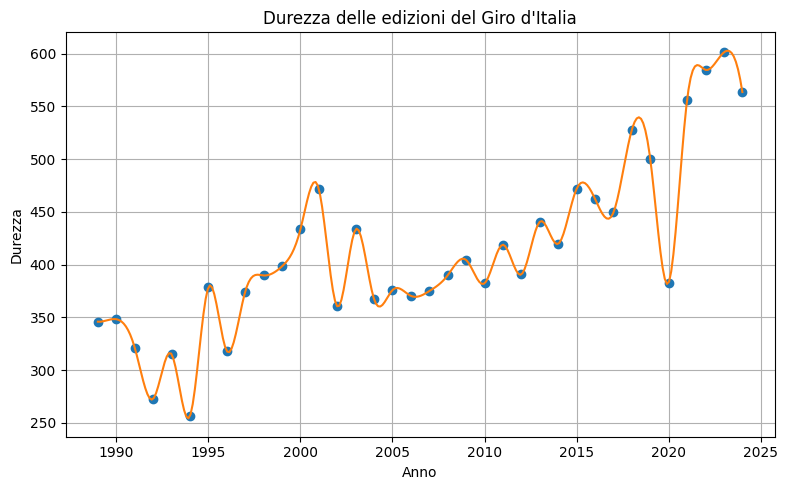

In [15]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Unisci i due dataset
merged_data = pd.merge(DatiGiro, CorrGiro, on='anno')
merged_data['km/h'] = df['km/h']

# Crea la colonna 'durezza' nel dataframe merged_data
merged_data['durezza'] = (merged_data['dislivello'] / merged_data['km']) * merged_data['km/h']

# Calcola la media di durezza per ogni anno
grouped_data = merged_data.groupby('anno')['durezza'].mean().reset_index()

plt.figure(figsize=(8,5))

# Interpolazione dei dati per la curva smussata
spl = make_interp_spline(grouped_data['anno'], grouped_data['durezza'], k=3)

years_new = np.linspace(grouped_data['anno'].min(), grouped_data['anno'].max(), 300)
durezza_smooth = spl(years_new)

# Plot dei dati originali e della curva smussata
plt.plot(grouped_data['anno'], grouped_data['durezza'], 'o', label='Dati')
plt.plot(years_new, durezza_smooth, '-', label='Andamento')
plt.xlabel('Anno')
plt.ylabel('Durezza')
plt.title('Durezza delle edizioni del Giro d\'Italia')
plt.grid(True)
plt.tight_layout()
plt.show()


Calcoliamo la durezza delle edizioni con <span style="color:red;">Dislivello/Km</span></p>
Permette di capire la variazione di difficolta negli anni nonostante i km diminuiti

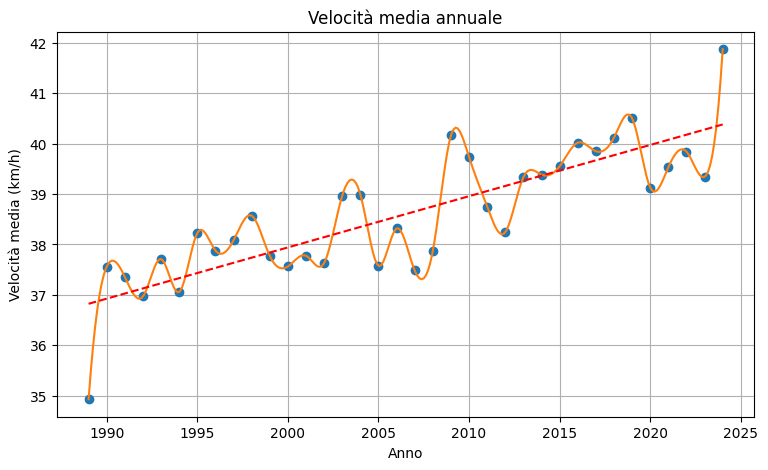

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
data=df['anno'],df['km/h']
dl=pd.DataFrame(data)
%matplotlib inline
# Calcolo della linea di tendenza
z = np.polyfit(df['anno'], df['km/h'], 1)
p = np.poly1d(z)

plt.figure(figsize=(9,5))

# Interpolazione spline
spl = make_interp_spline(df['anno'], df['km/h'], k=3)

# Calcolo dei nuovi dati interpolati per curva 
years_new = np.linspace(df['anno'].min(), df['anno'].max(), 300)
kmh_smooth = spl(years_new)

# Plot della linea di tendenza e della curva smussata
plt.plot(df['anno'], df['km/h'], 'o', label='Dati')
plt.plot(years_new, kmh_smooth, '-', label='Linea di andamento')
plt.plot(df['anno'], p(df['anno']), 'r--', label='Retta di tendenza')
plt.xlabel('Anno')
plt.ylabel('Velocità media (km/h)')
plt.title('Velocità media annuale')
plt.grid(True)
plt.show()

Km/TempoTot otteniamo la velocita media, osserviamo come ha tendenza linearmente positiva

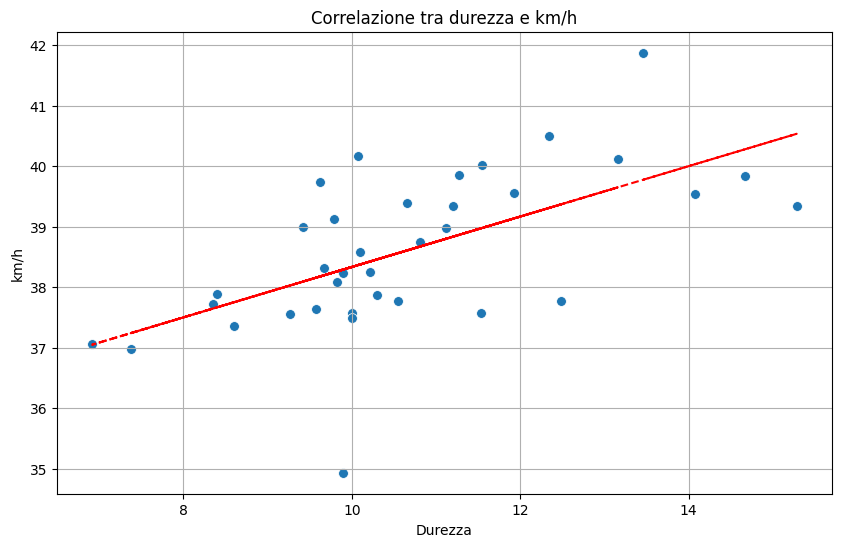

Coefficiente di correlazione: 0.61


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['durezza'] = (DatiGiro['dislivello'] / DatiGiro['km'])
# Creazione dello scatterplot con gli assi invertiti
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['durezza'], y=df['km/h'], s=50)

# Calcolo della retta di tendenza con assi invertiti
z = np.polyfit(df['durezza'], df['km/h'], 1)
p = np.poly1d(z)
plt.plot(df['durezza'], p(df['durezza']), 'r--', label='Retta di tendenza')

# Titolo e label degli assi invertiti
plt.title('Correlazione tra durezza e km/h')
plt.xlabel('Durezza')
plt.ylabel('km/h')
plt.grid(True)

# Calcolo del coefficiente di correlazione con assi invertiti
correlazione = np.corrcoef(df['durezza1'], df['km/h'])[0, 1]

# Mostra il grafico con gli assi invertiti
plt.show()
print(f"Coefficiente di correlazione: {correlazione:.2f}")

Tendendo sempre in cosiderazione la durezza con <span style="color:red;">Dislivello/KmTotali</span>

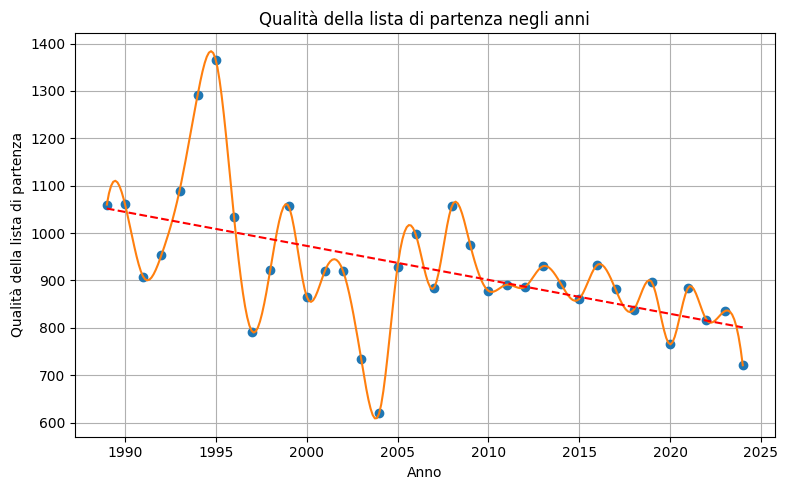

In [24]:
# Calcolo della retta di tendenza per la startlist quality
z = np.polyfit(DatiGiro['anno'], DatiGiro['startListQuality'], 1)
p = np.poly1d(z)

# Creazione della spline
spl = make_interp_spline(DatiGiro['anno'], DatiGiro['startListQuality'], k=3)
years_new = np.linspace(DatiGiro['anno'].min(), DatiGiro['anno'].max(), 300)
startlist_smooth = spl(years_new)

# Creazione del grafico
plt.figure(figsize=(8, 5))

# Plot dei dati originali e della curva smussata per la startlist quality
plt.plot(DatiGiro['anno'], DatiGiro['startListQuality'], 'o', label='Dati')
plt.plot(years_new, startlist_smooth, '-', label='Andamento')
plt.plot(DatiGiro['anno'], p(DatiGiro['anno']), 'r--', label='Retta di tendenza')
plt.xlabel('Anno')
plt.ylabel('Qualità della lista di partenza')
plt.title('Qualità della lista di partenza negli anni')
plt.grid(True)
plt.tight_layout()
plt.show()

Punteggio: top10: <span style="color:red;">50</span>, top25: <span style="color:red;">35</span>, top50: <span style="color:red;">20</span>, top100: <span style="color:red;">10</span>, top200: <span style="color:red;">5</span>, top500: <span style="color:red;">2</span>, top1000: <span style="color:red;">1</span>

# Caratteristiche dei corridori

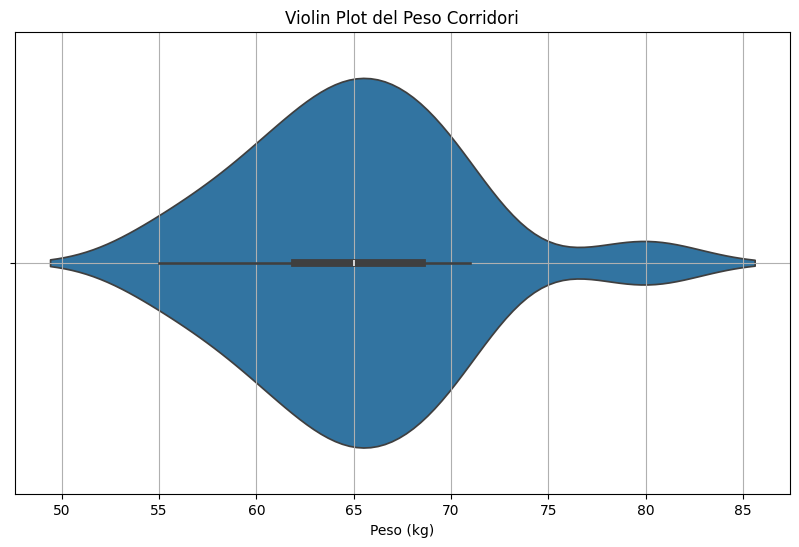

In [25]:
# Creazione del violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=merged_data['peso'])
plt.title('Violin Plot del Peso Corridori')
plt.xlabel('Peso (kg)')
plt.grid(True)
plt.show()

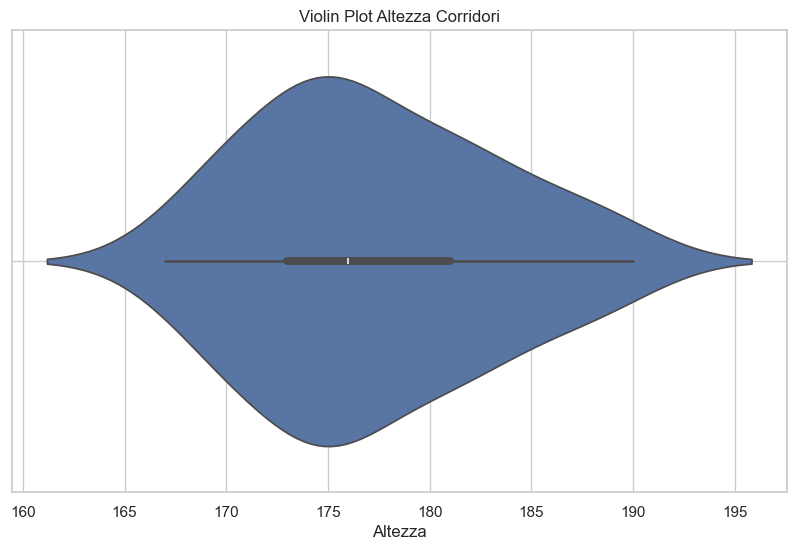

In [63]:
# Creazione del violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=merged_data['altezza'])
plt.title('Violin Plot Altezza Corridori')
plt.xlabel('Altezza')
plt.grid(True)
plt.show()

In [70]:

# Converte l'altezza da centimetri a metri
merged_data_vincitori['altezza_m'] = merged_data_vincitori['altezza'] / 100

# Calcola il BMI
merged_data_vincitori['BMI'] = merged_data_vincitori['peso'] / (merged_data_vincitori['altezza_m'] ** 2)
merged_data_vincitori = merged_data_vincitori.dropna(subset=['durezza', 'BMI'])
# Visualizza le prime righe del DataFrame con il BMI calcolato
print(merged_data_vincitori[['corridore', 'peso', 'altezza', 'BMI']].head())


         corridore  peso  altezza        BMI
0   Laurent Fignon  67.0    174.0  22.129740
1     Gianni Bugno  68.0    177.0  21.705129
3  Miguel Indurain  80.0    188.0  22.634676
4  Miguel Indurain  80.0    188.0  22.634676
5    Evgeni Berzin  68.0    176.0  21.952479


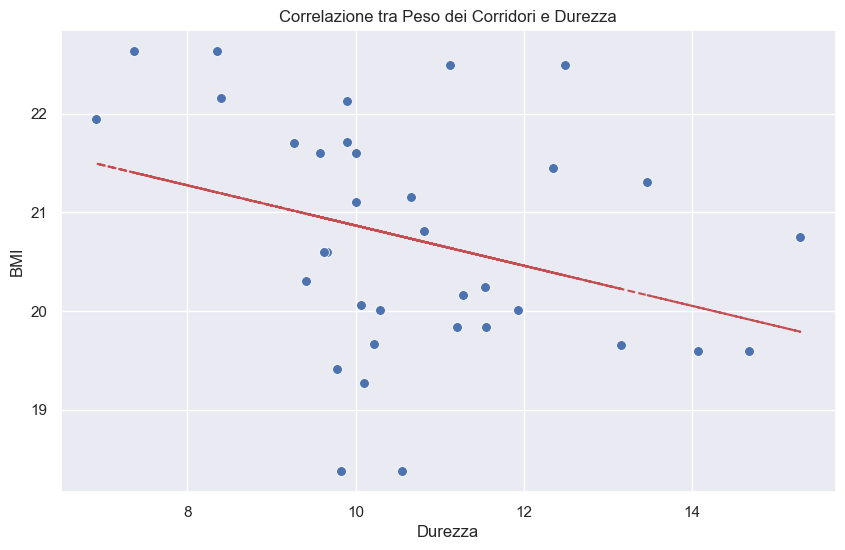

Coefficiente di correlazione: -0.32


In [74]:
# Scatterplot e retta di regressione: Peso vs Durezza
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data_vincitori['durezza'], y=merged_data_vincitori['BMI'], s=50)

# Calcolo della retta di tendenza
z = np.polyfit(merged_data_vincitori['durezza'], merged_data_vincitori['BMI'], 1)
p = np.poly1d(z)
plt.plot(merged_data_vincitori['durezza'], p(merged_data_vincitori['durezza']), 'r--', label='Retta di tendenza')

# Titolo e label degli assi
plt.title('Correlazione tra Peso dei Corridori e Durezza')
plt.xlabel('Durezza')
plt.ylabel('BMI')

plt.grid(True)

# Calcolo del coefficiente di correlazione
correlazione = np.corrcoef(merged_data_vincitori['durezza'], merged_data_vincitori['BMI'])[0, 1]

# Mostra il grafico
plt.show()
print(f"Coefficiente di correlazione: {correlazione:.2f}")

BMI: peso/altezza^2

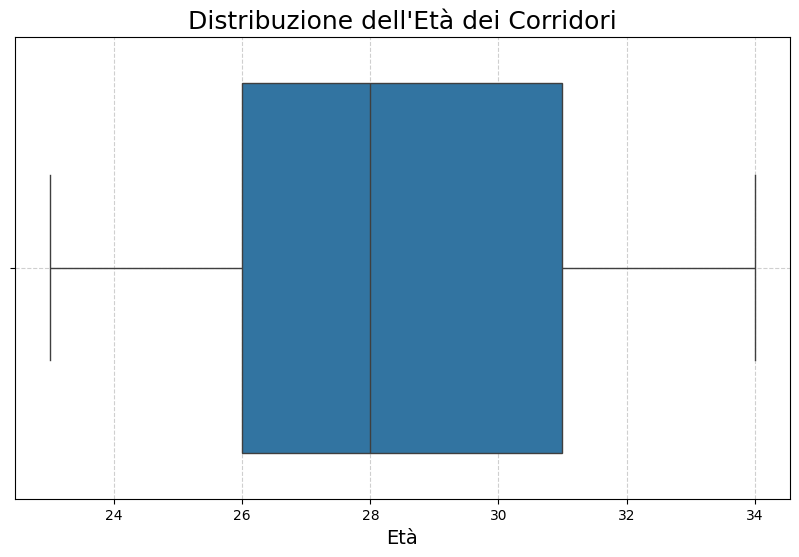

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta le dimensioni della figura
plt.figure(figsize=(10, 6))

# Crea il boxplot per la distribuzione dell'età
sns.boxplot(x=merged_data_vincitori['eta'])

# Aggiungi titolo e label degli assi
plt.title('Distribuzione dell\'Età dei Corridori', fontsize=18)
plt.xlabel('Età', fontsize=14)

# Mostra il grafico
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


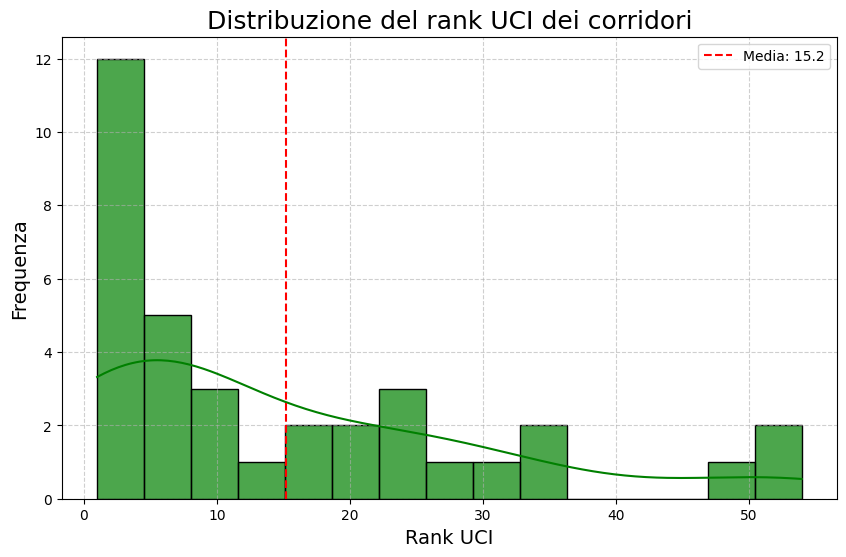

In [44]:

# Distribuzione dell'eta dei corridori
plt.figure(figsize=(10, 6))
sns.histplot(merged_data_vincitori['Rank UCI'], bins=15, kde=True, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribuzione del rank UCI dei corridori', fontsize=18)
plt.xlabel('Rank UCI', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.axvline(merged_data_vincitori['Rank UCI'].mean(), color='red', linestyle='--', label=f'Media: {merged_data_vincitori["Rank UCI"].mean():.1f}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Corridore vincente ha piu possibilita di vittoria

# Chi ha vinto di piu?

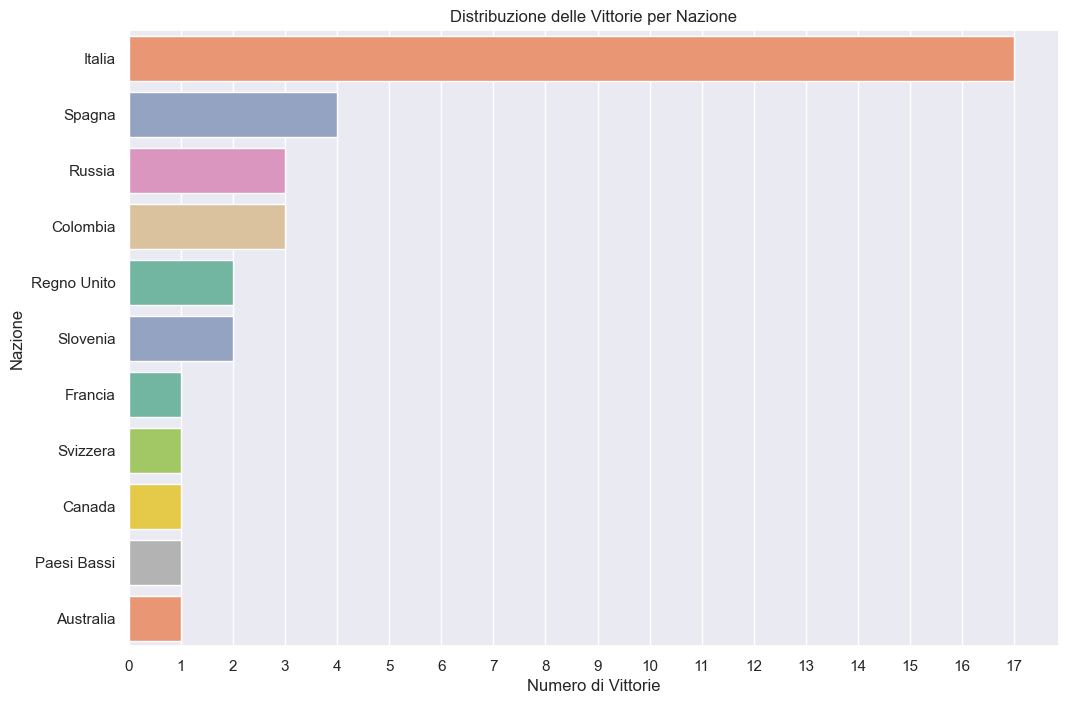

In [66]:
plt.figure(figsize=(12, 8))
# Conta il numero di vittorie per nazione
sns.countplot(y='nazione', data=merged_data, palette='Set2', hue='nazione', legend=False, order=merged_data['nazione'].value_counts().index)
plt.title('Distribuzione delle Vittorie per Nazione')
plt.xlabel('Numero di Vittorie')
plt.ylabel('Nazione')

# Imposta l'incremento dell'asse x a 1
max_vittorie = merged_data['nazione'].value_counts().max()
plt.xticks(np.arange(0, max_vittorie + 1, 1))

plt.show()

Possiamo osservare come l'Italia sia stato un tassello importante conquistando diverse edizioni, 

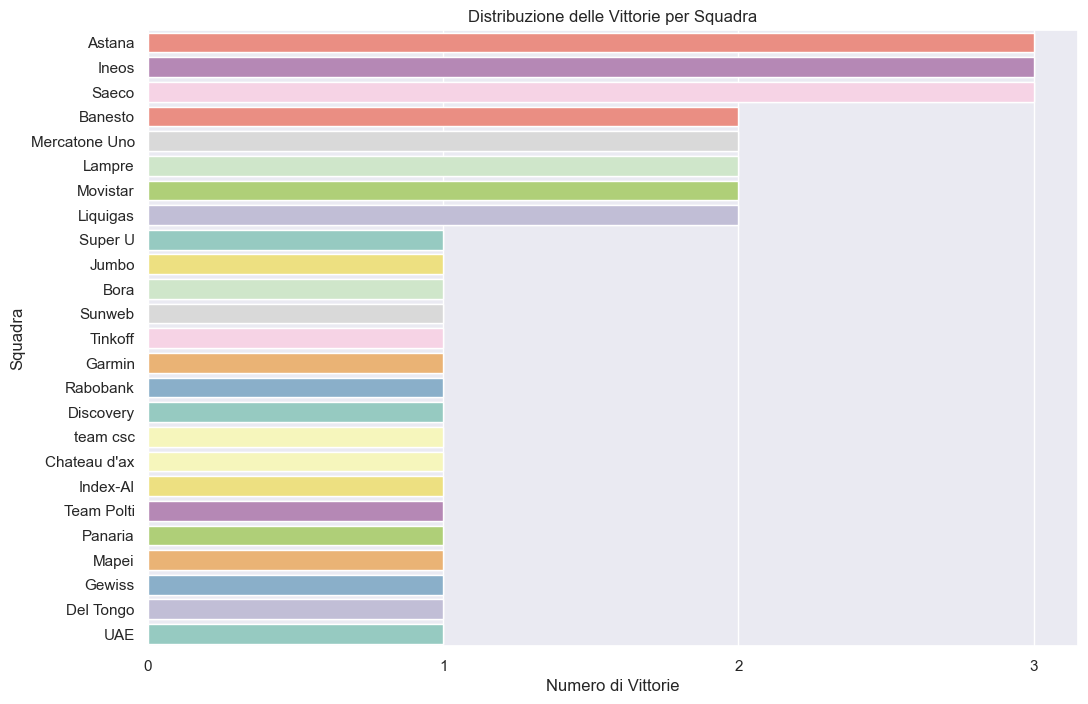

In [65]:
plt.figure(figsize=(12, 8))
# Conta il numero di vittorie per squadra
sns.countplot(y='squadra', data=merged_data, palette='Set2', hue='squadra', legend=False, order=merged_data['squadra'].value_counts().index)
plt.title('Distribuzione delle Vittorie per Squadra')
plt.xlabel('Numero di Vittorie')
plt.ylabel('Squadra')

# Imposta l'incremento dell'asse x a 1
max_vittorie = merged_data['squadra'].value_counts().max()
plt.xticks(np.arange(0, max_vittorie + 1, 1))
sns.countplot(y='squadra', data=merged_data, palette='Set3', hue='squadra', legend=False, order=merged_data['squadra'].value_counts().index)
plt.show()



<span style="color:red;">Astana</span> <span style="color:purple;">Ineos</span> <span style="color:orange;">Saeco</span> conquistano entrambe 3 edizioni

# Ricapitolando
- Giro sta avendo <span style="color:green;">riduzione dei km e maggiore dislivello</span>, quindi sempre piu duro con <span style="color:green;"> aumento velocita media</span>, con coefficente di correlazione di 0.61, </span>. Qualita dei partenti sta riducendo nonostante le prestazioni maggiori, con il rischio di monopolizzazione
- Caratteristiche di un corridore sono <span style="color:green;">176cm per 65kg di peso</span>, con  <span style="color:green;">aumento durezza si ha un calo di BMI</span>, media eta di vittoria 28 anni, 
- <span style="color:green;">Nazione piu vincente</span> e <span style="color:red;">l'Italia</span> mentre le <span style="color:green;">squadre piu vincenti</span> sono 3 a parimerito: <span style="color:red;">Astana,Ineos e Saeco</span>